In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_curve,log_loss,f1_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')

**iMPORTING VARIABLES**

***Importing libraries***

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [6]:
df = pd.read_csv("/content/Default Rate.csv", sep = ',', index_col = 0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


**Loading the dataset**

In [7]:
df.columns.tolist()

['default', 'student', 'balance', 'income']

**DATA EXPLORATION**

In [8]:
for attr in df.columns:
    print('\n*' + attr +'*')
    print(df[attr].value_counts())


*default*
No     9667
Yes     333
Name: default, dtype: int64

*student*
No     7056
Yes    2944
Name: student, dtype: int64

*balance*
0.000000       499
1500.894533      1
1273.581981      1
1033.455043      1
500.252724       1
1077.747127      1
471.356517       1
674.640159       1
435.592200       1
1829.909941      1
714.397171       1
1393.589491      1
603.253138       1
692.034167       1
596.205214       1
805.520628       1
946.892056       1
973.082364       1
1553.289604      1
438.625085       1
1546.842501      1
207.303809       1
170.260237       1
341.040379       1
1007.277995      1
631.172612       1
1028.767207      1
316.536435       1
785.430997       1
1335.028018      1
              ... 
771.133261       1
935.712944       1
1549.042755      1
1100.238779      1
778.830166       1
1024.408305      1
1054.485054      1
1163.083904      1
1658.602257      1
1318.719112      1
221.334856       1
781.613730       1
230.230588       1
561.343259       1
2034.674

In [9]:
df.default.value_counts(normalize=True)*100

No     96.67
Yes     3.33
Name: default, dtype: float64

In [10]:
df.shape

(10000, 4)

In [12]:
print(df.info())
print('--'*40)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB
None
--------------------------------------------------------------------------------


In [13]:
#Check for missing values in the data set
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [14]:
#Let us encode our target variable to 0 for 'yes' and 1 to represent 'no'
df.replace(('Yes', 'No'), (1, 0), inplace=True) 
df.head()

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879


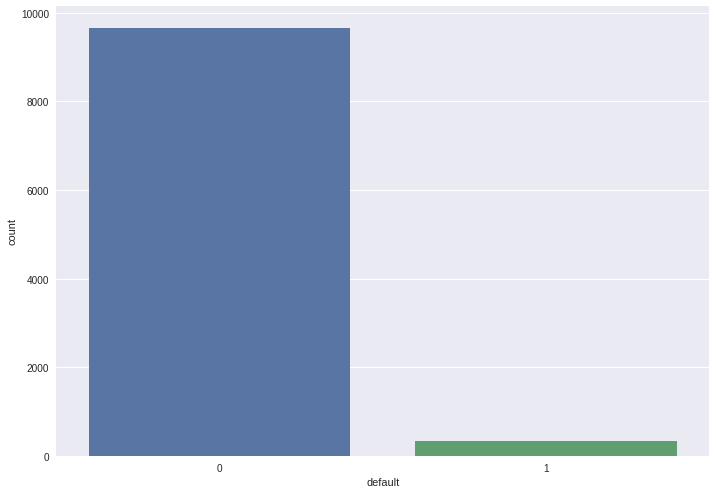

In [79]:
sns.countplot('default', data=df)

**EXPLORATORY DATA ANALYSIS**

In [83]:
# now let us check in the number of Percentage
Count_Non_defaulters = len(df[df["default"]==0]) # non defaulters are repersented by 0
Count_defaulters = len(df[df["default"]==1]) #  defaulters by 1
Percentage_of_Non_defaulters = Count_Non_defaulters/(Count_Non_defaulters+Count_defaulters)
print("percentage of  non defaulters is",Percentage_of_Non_defaulters*100)
Percentage_of_defaulters= Count_defaulters/(Count_Non_defaulters+Count_defaulters)
print("percentage of defaulters",Percentage_of_defaulters*100)

percentage of  non defaulters is 96.67
percentage of defaulters 3.3300000000000005


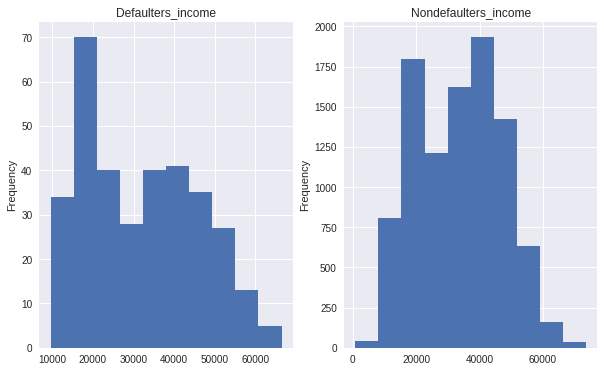

In [86]:
Defaulters_income = df[df["default"]==1]
Nondefaulters_income= df[df["default"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
Defaulters_income.income.plot.hist(title="Defaulters_income")
plt.subplot(122)
Nondefaulters_income.income.plot.hist(title="Nondefaulters_income")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57aad6a710>]],
      dtype=object)

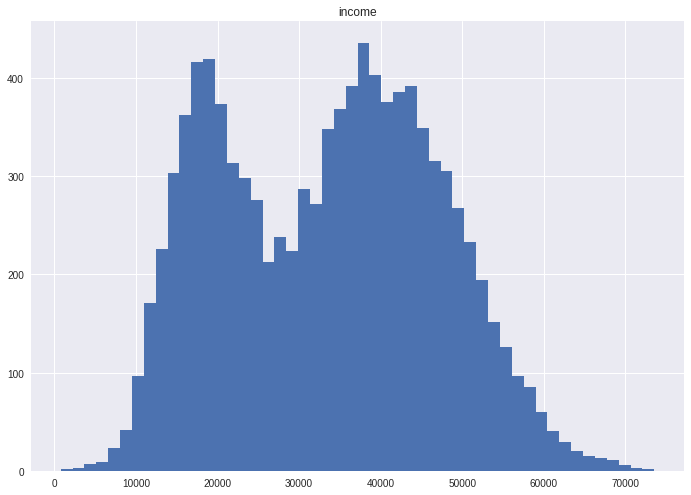

In [88]:
df.hist(column='income', bins=50)

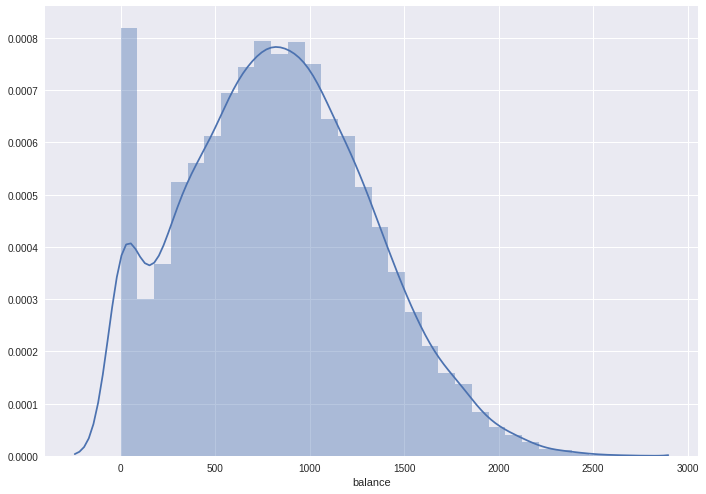

In [89]:
sns.distplot(df['balance'], bins=30)

In [15]:
df.default.value_counts()

0    9667
1     333
Name: default, dtype: int64

**Check for imbalancing in the response variable of the training dataset**

In [16]:
df.default.value_counts(normalize=True)*100

0    96.67
1     3.33
Name: default, dtype: float64

**The response variable in the training set is imbalanced since its 96.67% Yes and 3.33% No**

In [17]:
X = df[['student', 'balance','income']] .values.astype(float)
X[0:5]

array([[0.00000000e+00, 7.29526495e+02, 4.43616251e+04],
       [1.00000000e+00, 8.17180407e+02, 1.21061347e+04],
       [0.00000000e+00, 1.07354916e+03, 3.17671389e+04],
       [0.00000000e+00, 5.29250605e+02, 3.57044939e+04],
       [0.00000000e+00, 7.85655883e+02, 3.84634959e+04]])

**FEATURE SELECTION**

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [19]:
logres1 = smf.ols('default ~ student + balance',data=df).fit()
print(logres1.summary())

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     707.1
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          6.21e-288
Time:                        00:29:29   Log-Likelihood:                 3652.5
No. Observations:               10000   AIC:                            -7299.
Df Residuals:                    9997   BIC:                            -7277.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0732      0.003    -21.599      0.0

All explanatory variables are significantly associated to the response variable.

We proceed to train our imbalanced data sets then later balance the two sets and compare their performance

In [20]:
X_train = df.drop('default',axis=1)
y_train = df['default']
X_train.shape,y_train.shape

((10000, 3), (10000,))

In [21]:
feature_df = df[['student', 'balance','income']]
X = np.asarray(feature_df)
X[0:5]

array([[0.00000000e+00, 7.29526495e+02, 4.43616251e+04],
       [1.00000000e+00, 8.17180407e+02, 1.21061347e+04],
       [0.00000000e+00, 1.07354916e+03, 3.17671389e+04],
       [0.00000000e+00, 5.29250605e+02, 3.57044939e+04],
       [0.00000000e+00, 7.85655883e+02, 3.84634959e+04]])

In [22]:
df['default'] = df['default'].astype('int')
y = np.asarray(df['default'])
y [0:5]

array([0, 0, 0, 0, 0])

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 3) (8000,)
Test set: (2000, 3) (2000,)


In [24]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

**K-Nearest Neighbor(KNN)**

In [0]:
Y_pred = knn.predict(X_test)

In [26]:
knn_score = accuracy_score(y_test,Y_pred)*100
knn_score

96.45

In [27]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.46      0.16      0.24        69

   micro avg       0.96      0.96      0.96      2000
   macro avg       0.71      0.58      0.61      2000
weighted avg       0.95      0.96      0.96      2000



In [0]:
from sklearn.tree import DecisionTreeClassifier

**Decision Tree**

In [29]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
Y_pred = dtree.predict(X_test)

In [31]:
dtree_score = accuracy_score(y_test,Y_pred)*100
dtree_score

95.5

In [32]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.36      0.38      0.37        69

   micro avg       0.95      0.95      0.95      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.96      0.95      0.96      2000



In [0]:
from sklearn.ensemble import RandomForestClassifier

**Random Forest**

In [34]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
Y_pred = random_forest.predict(X_test)

In [36]:
'''mat = confusion_matrix(y_test, Y_pred)
sns.heatmap(mat, square=True, annot=True,fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')'''

"mat = confusion_matrix(y_test, Y_pred)\nsns.heatmap(mat, square=True, annot=True,fmt='d', cbar=False)\nplt.xlabel('true label')\nplt.ylabel('predicted label')"

In [37]:
random_forest_acc = accuracy_score(y_test,Y_pred)*100
random_forest_acc

97.0

In [38]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1931
           1       0.62      0.35      0.44        69

   micro avg       0.97      0.97      0.97      2000
   macro avg       0.80      0.67      0.71      2000
weighted avg       0.96      0.97      0.97      2000



In [39]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Naive Bayes**

In [0]:
Y_pred = naive_bayes.predict(X_test)

In [41]:
naive_score = accuracy_score(y_test,Y_pred)*100
naive_score

97.15

In [42]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1931
           1       0.71      0.29      0.41        69

   micro avg       0.97      0.97      0.97      2000
   macro avg       0.84      0.64      0.70      2000
weighted avg       0.97      0.97      0.97      2000



In [92]:
models = pd.DataFrame({'Model':['KNN','Decision Tree','Random Forest','Naive Bayes'],
                      'Score':[knn_score,dtree_score,random_forest_acc,naive_score]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Naive Bayes,97.15
2,Random Forest,97.00
0,KNN,96.45
1,Decision Tree,95.50


**Naive Bayes has the highest accuracy at 97.15%**

In [0]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from collections import Counter

**Handling imbalanced Data Sets**

In [46]:
X_train_resampled,y_train_resampled = SMOTE().fit_sample(X_train,y_train)
X_test_resampled,y_test_resampled = SMOTE().fit_sample(X_test,y_test)
print("Resampled training set:")
print(sorted(Counter(y_train_resampled).items()))

print("Resampled testing set:")
print(sorted(Counter(y_test_resampled).items()))

Resampled training set:
[(0, 7736), (1, 7736)]
Resampled testing set:
[(0, 1931), (1, 1931)]


In [47]:
#Logistic Regression with Cross Validation
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
lr = LogisticRegression(random_state=42)
log_reg = GridSearchCV(lr, tuned_parameters, cv=10)
log_reg.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
y_pred_log = log_reg.predict(X_test_resampled)
score_log_reg = accuracy_score(y_test_resampled,y_pred_log)
print('===='*10)
print('Best parameters:',log_reg.best_params_)
print('===='*10)
print('Classification Accuracy:')
print(score_log_reg)
print('===='*10)
print("Confusion Matrix:")
print(confusion_matrix(y_pred_log,y_test_resampled))
print('===='*10)
print('Log Loss:')
log_probs = log_reg.predict_proba(X_test_resampled)
lg_log_loss = log_loss(y_test_resampled,log_probs)
print(lg_log_loss)
print('===='*10)
print('F1 Score')
lg_f_score = f1_score(y_test_resampled,y_pred_log)
print(lg_f_score) 
print('===='*10)
print('Area under curve')
lg_auc = roc_auc_score(y_test_resampled,y_pred_log)
print(lg_auc)

Best parameters: {'C': 1}
Classification Accuracy:
0.8920248575867427
Confusion Metrix:
[[1667  153]
 [ 264 1778]]
Log Loss:
0.2628407805453736
F1 Score
0.8950415303297257
Area under curve
0.8920248575867427


In [0]:
from sklearn import metrics

In [50]:
metrics.precision_score(y_test_resampled,y_pred_log)

0.8707149853085211

In [51]:
metrics.recall_score(y_test_resampled,y_pred_log)

0.9207664422578975

In [52]:
print(classification_report(y_test_resampled,y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1931
           1       0.87      0.92      0.90      1931

   micro avg       0.89      0.89      0.89      3862
   macro avg       0.89      0.89      0.89      3862
weighted avg       0.89      0.89      0.89      3862



In [53]:
#Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid2 = {"n_estimators": [10, 18, 22],
              "max_depth": [3, 5],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1]}
r_forest = GridSearchCV(rf,param_grid2,cv=10)
r_forest.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 18, 22], 'max_depth': [3, 5], 'min_samples_split': [15, 20], 'min_samples_leaf': [5, 10, 20], 'max_leaf_nodes': [20, 40], 'min_weight_fraction_leaf': [0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
r_forest_pred = r_forest.predict(X_test_resampled)
score_rf = accuracy_score(y_test_resampled,r_forest_pred)
print('===='*10)
print('Best parameters',r_forest.best_params_)
print('===='*10)
print('Classification Accuracy:')
print(score_rf)
print('===='*10)
print("Confusion Metrix:")
print(confusion_matrix(r_forest_pred,y_test_resampled))
print('===='*10)
print('Log Loss:')
rf_probs = r_forest.predict_proba(X_test_resampled)
rf_log_loss = log_loss(y_test_resampled,rf_probs)
print(rf_log_loss)
print('===='*10)
print('F1 Score')
rf_f_score = f1_score(y_test_resampled,r_forest_pred)
print(rf_f_score) 
print('===='*10)
print('Area under curve')
rf_auc = roc_auc_score(y_test_resampled,r_forest_pred)
print(rf_auc)

Best parameters {'max_depth': 5, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 15, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 18}
Classification Accuracy:
0.9003107198342828
Confusion Metrix:
[[1692  146]
 [ 239 1785]]
Log Loss:
0.3763649990254544
F1 Score
0.9026548672566371
Area under curve
0.9003107198342828


In [55]:
print(classification_report(y_test_resampled,r_forest_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1931
           1       0.88      0.92      0.90      1931

   micro avg       0.90      0.90      0.90      3862
   macro avg       0.90      0.90      0.90      3862
weighted avg       0.90      0.90      0.90      3862



In [0]:
print(classification_report(y_test_resampled,y_pred_knnrs))

In [56]:
#Decision Trees
dt = DecisionTreeClassifier(random_state=42)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
dtree_rs = GridSearchCV(dt, param_grid=params, n_jobs=-1,cv=10)
dtree_rs.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'random_state': [123]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
#The best hyper parameters set
y_pred_dt = dtree_rs.predict(X_test_resampled)
score_dtree = accuracy_score(y_test_resampled,y_pred_dt)
print('===='*10)
print('Best parameters',dtree_rs.best_params_)
print('===='*10)
print('Classification Accuracy:')
print(score_dtree)
print('===='*10)
print("Confusion Metrix:")
print(confusion_matrix(y_pred_dt,y_test_resampled))
print('===='*10)
print('Log Loss:')
dt_probs = dtree_rs.predict_proba(X_test_resampled)
dt_log_loss = log_loss(y_test_resampled,dt_probs)
print(dt_log_loss)
print('===='*10)
print('F1 Score')
dt_f_score = f1_score(y_test_resampled,y_pred_dt)
print(dt_f_score) 
print('===='*10)
print('Area under curve')
dt_auc = roc_auc_score(y_test_resampled,y_pred_dt)
print(dt_auc)

Best parameters {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 15, 'random_state': 123}
Classification Accuracy:
0.8039875712066287
Confusion Metrix:
[[1780  606]
 [ 151 1325]]
Log Loss:
4.385730835682936
F1 Score
0.7778103903727619
Area under curve
0.8039875712066288


In [58]:
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train_resampled,y_train_resampled)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
y_pred_nb = nb.predict(X_test_resampled)
score_nb = accuracy_score(y_test_resampled,y_pred_nb)
print('===='*10)
print('Classification Accuracy:')
print(score_nb)
print('===='*10)
print("Confusion Metrix:")
print(confusion_matrix(y_pred_nb,y_test_resampled))
print('===='*10)
print('Log Loss:')
nb_probs = nb.predict_proba(X_test_resampled)
nb_log_loss = log_loss(y_test_resampled,nb_probs)
print(nb_log_loss)
print('===='*10)
print('F1 Score')
nb_f_score = f1_score(y_test_resampled,y_pred_nb)
print(nb_f_score) 
print('===='*10)
print('Area under curve')
nb_auc = roc_auc_score(y_test_resampled,y_pred_nb)
print(nb_auc)

Classification Accuracy:
0.8974624546866908
Confusion Metrix:
[[1672  137]
 [ 259 1794]]
Log Loss:
0.2597803536851469
F1 Score
0.9006024096385543
Area under curve
0.897462454686691


In [60]:
print(classification_report(y_test_resampled,y_pred_nb))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1931
           1       0.87      0.93      0.90      1931

   micro avg       0.90      0.90      0.90      3862
   macro avg       0.90      0.90      0.90      3862
weighted avg       0.90      0.90      0.90      3862



In [64]:
all_scores = pd.DataFrame({'Algorithm':['Decision Tree','Random Forest','Naive Bayes','Logistic Regression'],
                         'Score':[score_dtree,score_rf,score_nb,score_log_reg]})
all_scores = all_scores.sort_values(by='Score',ascending=False)
all_scores

,Algorithm,Score
1,Random Forest,0.900311
2,Naive Bayes,0.897462
3,Logistic Regression,0.892025
0,Decision Tree,0.803988


In [65]:
Log_loss = pd.DataFrame({'Algorithm':['Decision Tree','Random Forest','Naive Bayes','Logistic Regression'],
                         'Logarithmic_Loss':[dt_log_loss,rf_log_loss,nb_log_loss,lg_log_loss]})
Log_loss = Log_loss.sort_values(by='Logarithmic_Loss',ascending=True)
Log_loss

,Algorithm,Logarithmic_Loss
2,Naive Bayes,0.259780
3,Logistic Regression,0.262841
1,Random Forest,0.376365
0,Decision Tree,4.385731


In [66]:
f1_score = pd.DataFrame({'Algorithm':['Decision Tree','Random Forest','Naive Bayes','Logistic Regression'],
                         'F1_Score':[dt_f_score,rf_f_score,nb_f_score,lg_f_score]})
f1_score = f1_score.sort_values(by='F1_Score',ascending=False)
f1_score

,Algorithm,F1_Score
1,Random Forest,0.902655
2,Naive Bayes,0.900602
3,Logistic Regression,0.895042
0,Decision Tree,0.777810


In [67]:
auc_score = pd.DataFrame({'Algorithm':['Decision Tree','Random Forest','Naive Bayes','Logistic Regression'],
                         'Auc_Score':[dt_auc,rf_auc,nb_auc,lg_auc]})
auc_score = auc_score.sort_values(by='Auc_Score',ascending=False)
auc_score

,Algorithm,Auc_Score
1,Random Forest,0.900311
2,Naive Bayes,0.897462
3,Logistic Regression,0.892025
0,Decision Tree,0.803988


In [0]:
X = df.drop('default',axis=1)
y = df['default']

In [0]:
from sklearn.model_selection import KFold,StratifiedKFold

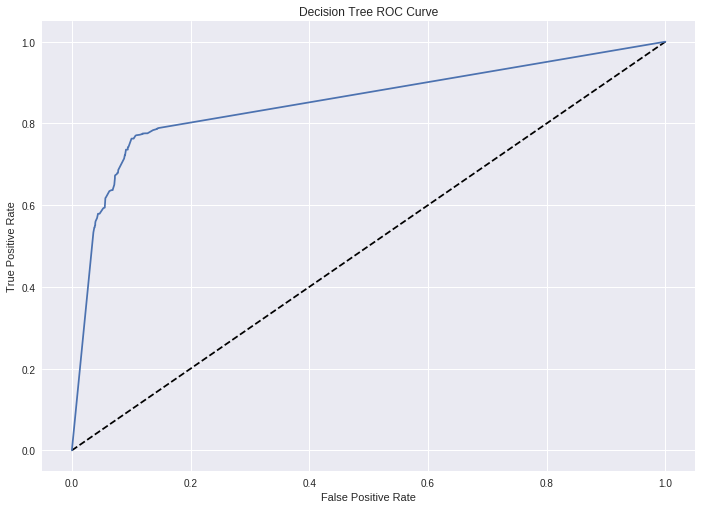

In [75]:
#ROC Curve with Decision Tree
dt_probs = dtree_rs.predict_proba(X_test_resampled)[:,-1]
fpr,tpr,thresholds = roc_curve(y_test_resampled,dt_probs)

#Plot ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show()

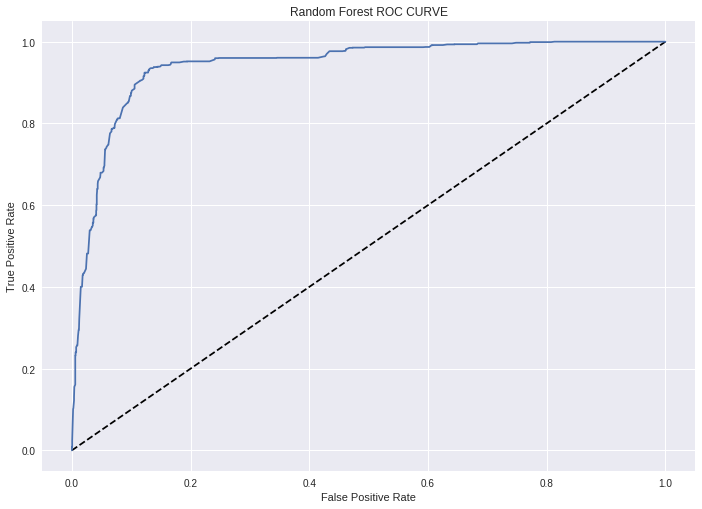

In [76]:
#Random Forest ROC
rf_probs = r_forest.predict_proba(X_test_resampled)[:,-1]
fpr,tpr,thresholds = roc_curve(y_test_resampled,rf_probs)

#Roc Curve Plot

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC CURVE')

plt.show()

In [0]:
I chose Decision tree because of its commanding good ROC_AUC score for use to score the new 
entrants. 